In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("artists.tsv", delimiter='\t')
raw_data.head()

,id,name,genres,followers,popularity
0,7EnWkKTmRG5i9rW93o5DZm,Axxad,viral rap,6049,47
1,1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"album rock, british invasion, classic rock, fo...",2262130,65
2,0cEVpgfIpUSsUKUMsRrhtZ,Mitch Rossell,"contemporary country, country, country pop, co...",27381,50
3,432R46LaYsJZV2Gmc4jUV5,Joy Division,"alternative rock, art rock, madchester, new wa...",1994832,63
4,5I7ErPVeubiYhds5DFcbfM,axxturel,NaN,15606,46


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4454 non-null   object
 1   name        4454 non-null   object
 2   genres      3799 non-null   object
 3   followers   4454 non-null   int64 
 4   popularity  4454 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 174.1+ KB


**I. Describe columns meaning:**

In [4]:
raw_data.columns

Index(['id', 'name', 'genres', 'followers', 'popularity'], dtype='object')

In [5]:
meaning_categories = dict.fromkeys(['column name', 'data type', 'meaning', 'example'])

meaning_categories['column name'] = raw_data.columns.tolist()

data_types = ['string', 'string', 'string', 'int', 'int']
meaning_categories['data type'] = data_types

cols_meaning = ['Id of artist', 'Name of artist', 'Artist genres', 'Artist number of followers', 'Artist popularity']
meaning_categories['meaning'] = cols_meaning

examples = []
for col in meaning_categories['column name']:
    examples.append(raw_data[col][0])
meaning_categories['example'] = examples

meaning_categories

{'column name': ['id', 'name', 'genres', 'followers', 'popularity'],
 'data type': ['string', 'string', 'string', 'int', 'int'],
 'meaning': ['Id of artist',
  'Name of artist',
  'Artist genres',
  'Artist number of followers',
  'Artist popularity'],
 'example': ['7EnWkKTmRG5i9rW93o5DZm', 'Axxad', 'viral rap', 6049, 47]}

In [6]:
pd.DataFrame.from_dict(meaning_categories).to_csv('artists_data_description.tsv', sep='\t', index=False)

**II. Check duplicated artists and get the number of unique artists**

Number of dupicated artists:

In [7]:
raw_data['id'].duplicated().sum()

2420

In [8]:
raw_data[raw_data['id'].duplicated()]

,id,name,genres,followers,popularity
15,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,"melodic rap, philly rap, rap, trap",14067489,85
63,08F3Y3SctIlsOEmKd6dnH8,Yusuf / Cat Stevens,"british folk, classic rock, folk, folk rock, m...",1615500,68
82,1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"album rock, british invasion, classic rock, fo...",2262130,65
84,757aE44tKEUQEqRuT6GnEB,Roddy Ricch,"melodic rap, rap, trap",8612380,81
85,2PU4qFehXQF7WnlFsJpBiJ,Raury,psychedelic hip hop,192850,49
...,...,...,...,...,...
4447,5H6xmHXjsq98NLbEjuE29f,NEIKED,"dance pop, edm, pop, pop dance, scandipop, tro...",132251,66
4448,4H1PNuHElBLVok0lnYMrRb,Dyo,alte,5695,51
4449,77CaCn32H4mOMQA7UElzfF,Academy of St. Martin in the Fields,"british orchestra, chamber orchestra, classica...",47376,65
4450,6NUhQz7eAEsZvjEHTKHux9,Sir Neville Marriner,"classical performance, orchestral performance",28038,64


Number of unique artists:

In [9]:
raw_data['id'].nunique()

2034

**III. Tracks participation of artists**

Counting artists occurences:

In [10]:
occurence_count = raw_data.groupby(raw_data.columns.to_list(), as_index=False).size()
occurence_count

,id,name,genres,followers,popularity,size
0,003f4bk13c6Q3gAUXv7dGJ,Wiener Philharmoniker,"austrian orchestra, classical performance, orc...",110584,66,1
1,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"art pop, pop",18878861,88,2
2,00gh6kmKYOu8xyorRxQm6a,Steve Roach,"ambient, drift, drone, fourth world, moog",32163,37,1
3,00i4PzAbt6fpwgBqdtSP0q,anbuu,chillhop,4216,40,1
4,02QYcz7JjwzKiKGHg53rZY,Sasha,dancehall queen,7167,54,1
...,...,...,...,...,...,...
1466,7xxrAPVVTZaXLTXfvwABVF,Lo Fi Hip Hop,lo-fi product,26409,47,1
1467,7yK3vix9XmeNwPDmjGs78F,Manal,"arabic hip hop, moroccan pop, rap maroc",428705,51,1
1468,7yL97o50EXql8p3iFo6MHe,Jake Eaw,anime piano,1578,41,5
1469,7z2avKuuiMAT4XZJFv8Rvh,Tom Walker,"indie anthem-folk, pop, uk pop",1000022,68,2


The most frequent artist:

In [11]:
occurence_count.loc[occurence_count['size'].idxmax()]

id                1dABGukgZ8XKKOdd2rVSHM
name                   Lofi Fruits Music
genres        lo-fi cover, lo-fi product
followers                         789617
popularity                            78
size                                 153
Name: 308, dtype: object

**IV. Dataset description**

In [12]:
data_description = raw_data.describe().astype('int')
data_description

,followers,popularity
count,4454,4454
mean,4404180,60
std,11069912,20
min,0,0
25%,38974,48
50%,545412,66
75%,3742855,76
max,105448608,100


<BarContainer object of 8 artists>

<Figure size 2000x2000 with 0 Axes>

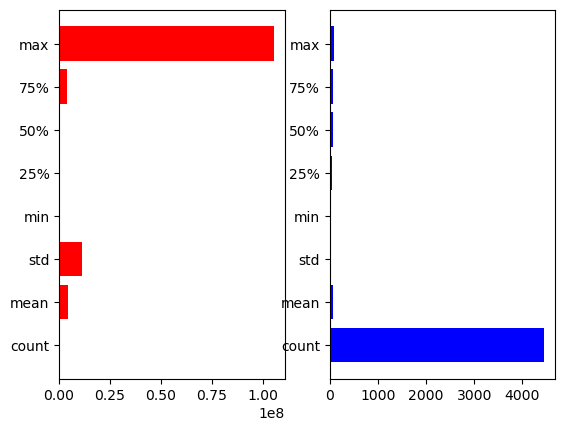

In [13]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(1, 2)
ax[0].barh(data_description.index, data_description['followers'], color = 'red')
ax[1].barh(data_description.index, data_description['popularity'], color = 'blue')

**V. Compute artists correlation**

In [15]:
raw_data.corr(method="spearman")

,followers,popularity
followers,1.000000,0.844653
popularity,0.844653,1.000000
